<div class="alert alert-block alert-info" align="center">
    <h1>
        Imports
    </h1>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import random_shift, random_shear, random_rotation, random_zoom
from keras.datasets import mnist, fashion_mnist, cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


<div class="alert alert-block alert-info" align="center">
    <h1>
        Functions
    </h1>
</div>

In [2]:
def plot_images(imgs, labels=None, rows=1, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    cols = max(1,len(imgs) // rows-1)
    labels_present = False
    # checking if labels is a numpy array
    if type(labels).__module__ == np.__name__:
        labels_present=labels.any()
    elif labels:
        labels_present=True
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols+1, i+1)
        # axis off, but leave a bounding box
        plt.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            left='off',
            right='off',
            labelbottom='off',
            labelleft='off')
        # plot labels if present
        if labels_present:
            subplot.set_title(labels[i], fontsize=fontsize)
        plt.imshow(imgs[i][:,:,0], cmap='Greys')
        
    plt.show()

# Extract n random samples of each class from the dataset
def get_random_sample(number_of_samples, data, labels):
    x = []
    y = []
    for category_number in range(0,10):
        # get all samples of a category
        train_data_category = data[labels==category_number]
        # pick a number of random samples from the category
        train_data_category = train_data_category[np.random.randint(train_data_category.shape[0], size=number_of_samples), :]
        x.extend(train_data_category)
        y.append([category_number]*number_of_samples)
    
    return np.asarray(x).reshape(-1, 28, 28, 1), y

<div class="alert alert-block alert-info" align="center">
    <h1>
        Generating data
    </h1>
</div>

<div align="center"><h1> Generating fashion mnist data </h1></div>

(20, 28, 28, 1)
(10, 2, 10)


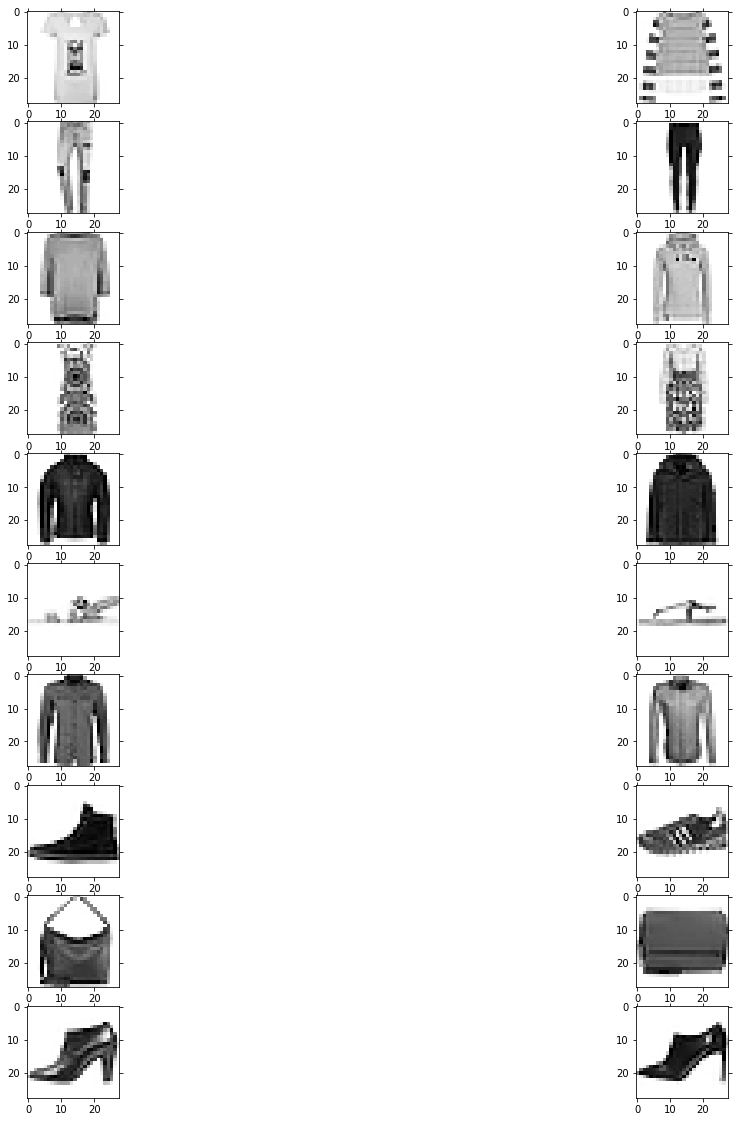

In [3]:
# Reading data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Getting n sample from each category
X_rand, y_rand = get_random_sample(2, X_train, y_train)

# Convert class vectors to binary class matrices
y_rand = to_categorical(y_rand)
    
print(f'{np.shape(X_rand)}')
print(f'{np.shape(y_rand)}')
plot_images(X_rand, rows=10, figsize=(20,20))

(28, 28, 1)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


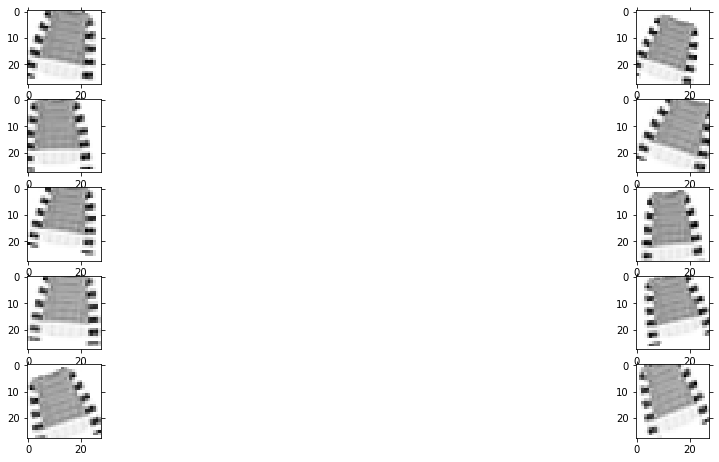

In [9]:
image = X_rand[1]
print(image.shape)
print(y_rand[1])

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False, 
        fill_mode='constant',
        cval=0
)

batches = 0
max_batches = 10
img_gen = []
lab_gen = []
cpt = 0
#for image in X_rand:
for x_batch in datagen.flow(image.reshape((1,) + image.shape), batch_size=max_batches):
    img_gen.append(x_batch[0])
    lab_gen.append(y_rand[cpt])
    batches += 1
    if batches >= max_batches:
        # generator loops indefinetly
        cpt += 1
        break
        
plot_images(img_gen, rows=10, figsize=(20,16))

In [11]:
print(lab_gen[1])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
